In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Seed
np.random.seed(5)

# Generate synthetic data
N = 500  # number of samples
X = 2 * np.random.rand(N, 1)  # One feature
y = 8 - 3 * X[:, 0] + 2/10*np.random.randn(N)  # y = 8 -3 3*x + noise

# Add intercept term
X_b = np.c_[np.ones((N, 1)), X]  # Shape: (N, 2)

# Compute weights using the equation
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predict outputs
y_fit = X_b.dot(w)

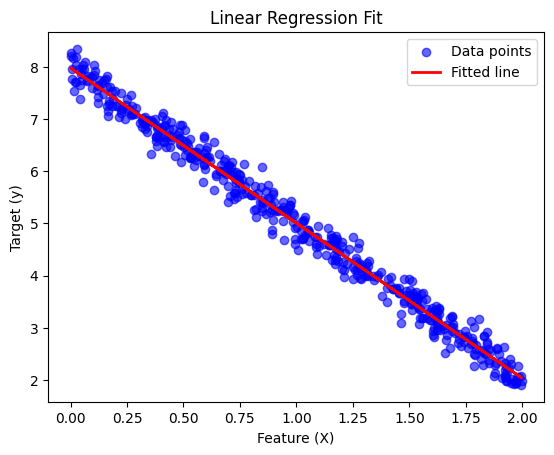

In [3]:
# Plot original data and the fitted line
plt.scatter(X, y, color='blue', alpha=0.6, label='Data points')
plt.plot(X, y_fit, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

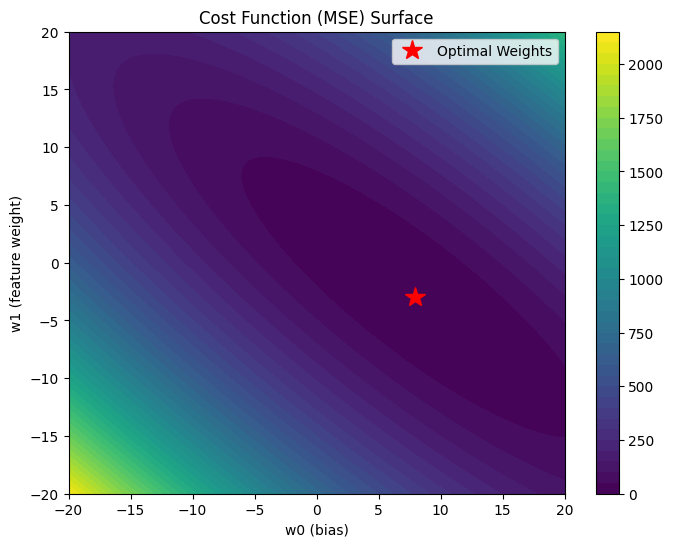

In [4]:
# 3D Plot of J(w), cost function
# Define cost function (Mean Squared Error)
def compute_cost(w0, w1, X_b, y):
    w = np.array([w0, w1])
    y_pred = X_b.dot(w)
    cost = np.mean((y - y_pred) ** 2)
    return cost

# Create a grid of weight values
w0_vals = np.linspace(-20, 20, 100)
w1_vals = np.linspace(-20, 20, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Compute cost for each combination of w0, w1
cost_vals = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        cost_vals[i, j] = compute_cost(W0[i, j], W1[i, j], X_b, y)

# Plot cost function surface
plt.figure(figsize=(8, 6))
contour = plt.contourf(W0, W1, cost_vals, levels=50, cmap='viridis')
plt.xlabel('w0 (bias)')
plt.ylabel('w1 (feature weight)')
plt.title('Cost Function (MSE) Surface')
plt.colorbar(contour)

# Mark the optimal weights found by normal equation
plt.plot(w[0], w[1], 'r*', markersize=15, label='Optimal Weights')
plt.legend()
plt.show()